## CNN with CIFAR -10

#### CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:

Airplanes
Cars
Birds
Cats
Deer
Dogs
Frogs
Horses
Ships
Trucks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from keras.datasets import cifar10
df = cifar10.load_data()
(X_train , y_train) , (X_test,y_test) = cifar10.load_data()

In [3]:
X_train.shape
#50000 samples---> coloured image --- r,g,b hence 3 channels. Each channel has 32 X 32 pixels

(50000, 32, 32, 3)

In [4]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## Vizualizing this data

[5]


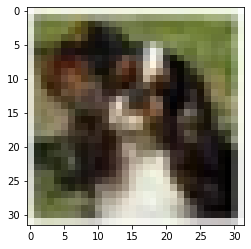

In [5]:
i=500
plt.imshow(X_train[i])
print(y_train[i])
#dog

(15, 15)
225


C:\Users\SV077490\Miniconda3\envs\ginger\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


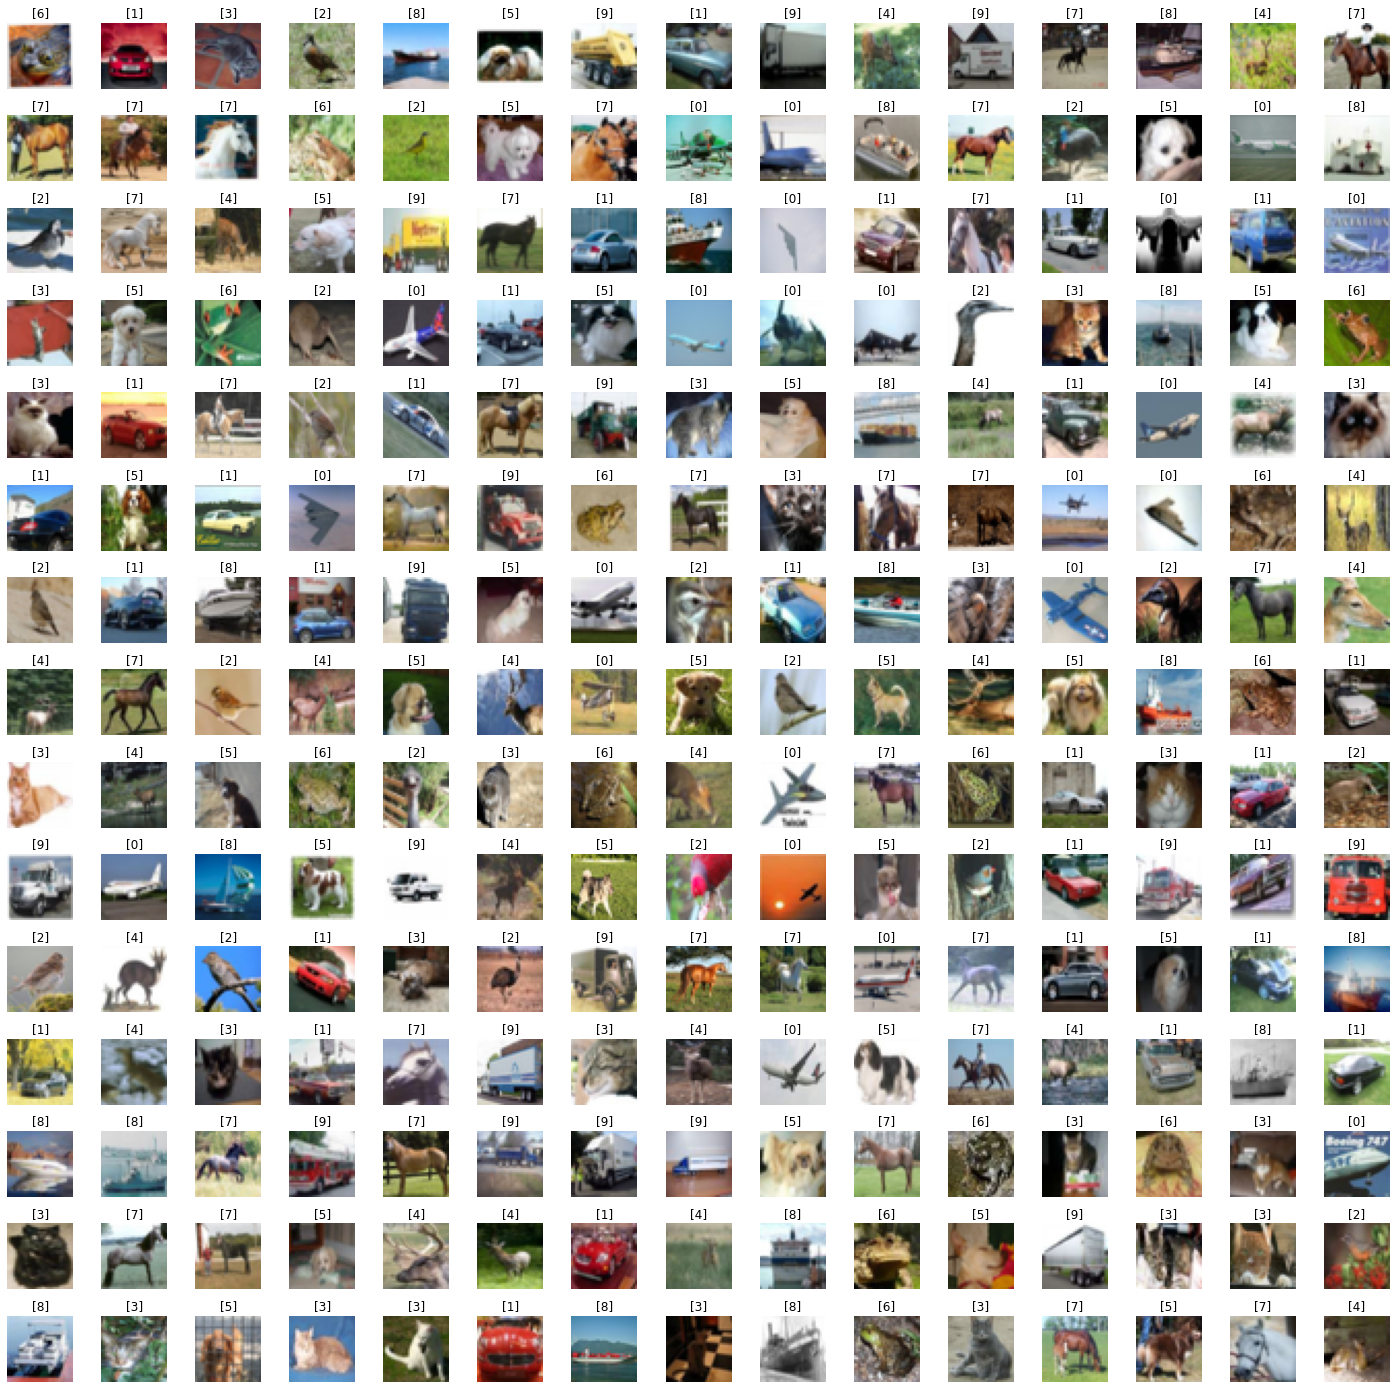

In [6]:
w_grid=15
l_grid=15

fig, axes = plt.subplots(l_grid, w_grid, figsize = (25, 25))



print((axes.shape))

# After ravel
axes = axes.ravel()
print(len(axes))
#15*15 -------> into a 1D array


#this is done so that we can plot a random image from 0-255

n_training = len(X_train)

for i in np.arange(0, l_grid * w_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
    #space betweent the images
plt.subplots_adjust(hspace = 0.4)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
categories=10

In [9]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [10]:
# Need to convert this into classes of 1's and 0's
import keras
y_train = keras.utils.np_utils.to_categorical(y_train,categories)
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
y_test = keras.utils.np_utils.to_categorical(y_test,categories)
y_test[0:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
    X_train[0]
    #rgb 32 X 32  for each pixel 3 values rgb
    
    #let us try to get all values between 0 to 1 like normaizing.
    X_train = X_train/255
    X_test = X_test/255


In [13]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [14]:
#so now we know that the input shape of each image = 32 X 32 X 3
#shape contains 5000 also
input_shape=X_train.shape[1:]
input_shape

(32, 32, 3)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard
import tensorflow

In [16]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [17]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [18]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 3, shuffle = True)

Epoch 1/3
1563/1563 [==============================] - 198s 126ms/step - loss: 1.5815 - accuracy: 0.4285
Epoch 2/3
1563/1563 [==============================] - 199s 127ms/step - loss: 1.2120 - accuracy: 0.5812
Epoch 3/3
1563/1563 [==============================] - 205s 131ms/step - loss: 1.1122 - accuracy: 0.6215


In [19]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(evaluation)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 8s 25ms/step - loss: 1.2724 - accuracy: 0.5521
[1.2723979949951172, 0.5521000027656555]
Test Accuracy: 0.5521000027656555


In [20]:
predicted_classes = (cnn_model.predict(X_test) > 0.5).astype("int32")
predicted_classes
predicted_classes = predicted_classes.argmax(1)
print(predicted_classes)


[0 8 8 ... 0 1 7]


In [21]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [22]:
#change back to classes to compare
y_test = y_test.argmax(1)

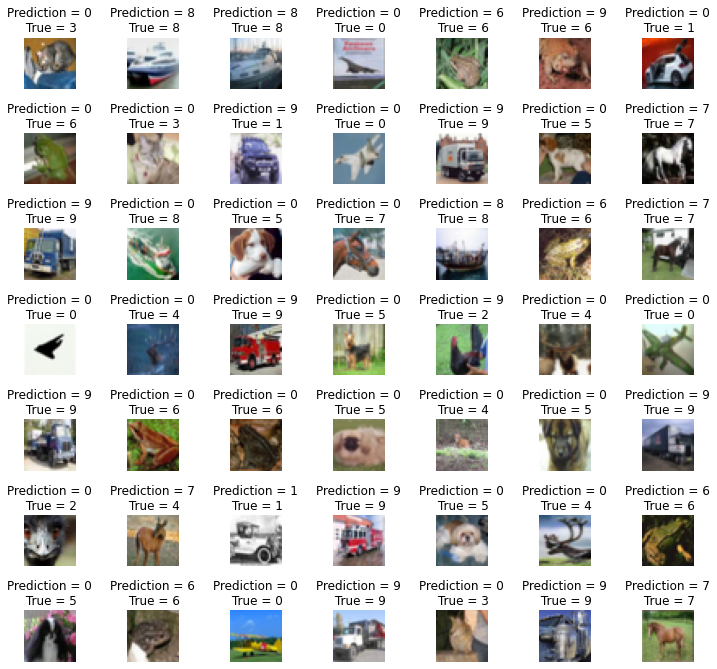

In [23]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

<AxesSubplot:>

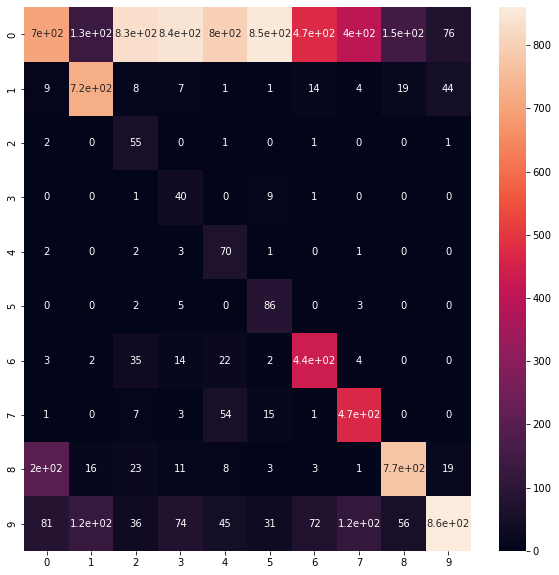

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes,y_test)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [25]:
#save the model
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# image augmentation

#this is to enable the model to perform better generalization 
#create different versions of the image to expose the model to more variance

In [26]:
# import keras
# from keras.datasets import cifar10
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [27]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

In [28]:
X_train.shape

(50000, 32, 32, 3)

In [29]:
n = 8 
X_train_sample = X_train[:n]
X_train_sample.shape

(8, 32, 32, 3)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
dataget_train = ImageDataGenerator(vertical_flip=True,rotation_range = 170)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
# dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

NameError: name 'X_train_sample' is not defined

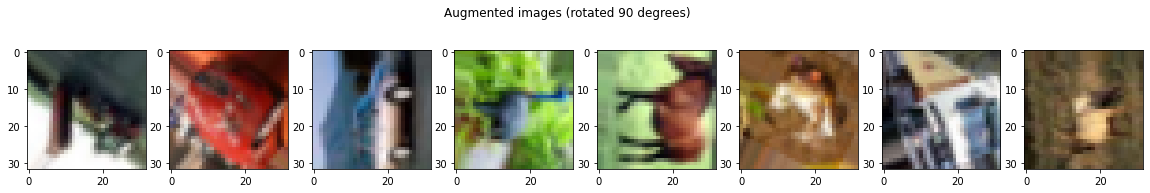

In [31]:
from keras.preprocessing.image import array_to_img


fig = plt.figure(figsize = (20,3))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            
            ax.imshow(array_to_img(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;


### image augmentation for the whole x_train . Make sure we create the model again( clean )  and complile it and run initial build
#run from start till the compilation of the model befor next steps.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True,rotation_range = 170)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
# dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train)

In [ ]:
cnn_model.fit(dataget_train.flow(X_train, y_train, batch_size = 32), epochs = 4)


In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])